# Exploratory Data Analysis - Retail
### The Sparks Foundation Task #3

* **Author : Hamza Bouajila**

## Importing Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn as sk

### Loading Data 

In [19]:
df = pd.read_csv('SampleSuperstore.csv' , sep =',')

In [20]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#### Inspecting Data 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [22]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#### Relationships between variables

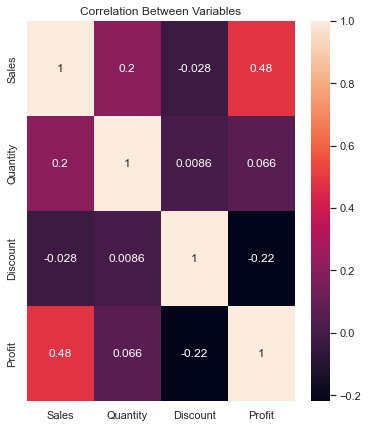

In [247]:
sns.heatmap(data = df.iloc[:,9:].corr() , annot = True).set(title = 'Correlation Between Variables');

> --->There is **no Correlation** between those variables 

#### Checking  profit per country 

In [227]:
df = df.groupby('Ship Mode').mean()
df.reset_index(inplace = True)

In [229]:
df.Profit.describe()

count     49.000000
mean      54.047842
std       51.200953
min      -36.186304
25%       32.902358
50%       56.810775
75%       85.045279
max      204.088936
Name: Profit, dtype: float64

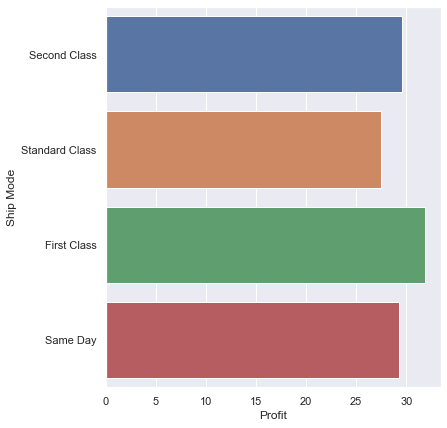

In [243]:
sns.barplot(data =  df , y = 'Ship Mode' ,x='Profit', ci = None );
sns.set(rc = {'figure.figsize' : (6,7)})

> ---> We can see that **Ship Mode** has **no effect** on the profit

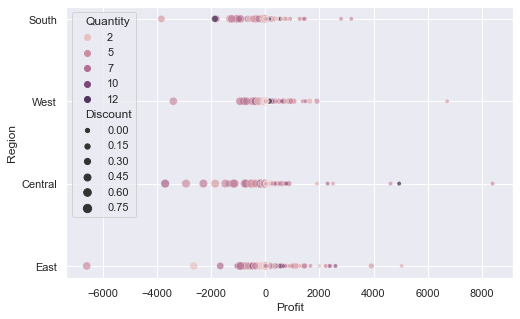

In [66]:
sns.scatterplot(data = df , y = 'Region' , x = 'Profit' , hue = 'Quantity' , size = 'Discount', alpha = 0.7 , color = 'b')
sns.set(rc={'figure.figsize':(8,5)})

> #### --> We can see that the center is the most region that contains negative profit , where there are much discounts , and the quantities from 2 to 7 , how can we make more profit in the center 

In [72]:
center = df.copy()

In [73]:
center = center.query('Region == "Central"')

In [74]:
center.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.810,5,0.8,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.544,3,0.8,-3.8160
16,Standard Class,Consumer,United States,Madison,Wisconsin,53711,Central,Office Supplies,Storage,665.880,6,0.0,13.3176
21,Standard Class,Corporate,United States,Fremont,Nebraska,68025,Central,Office Supplies,Art,19.460,7,0.0,5.0596
22,Standard Class,Corporate,United States,Fremont,Nebraska,68025,Central,Office Supplies,Appliances,60.340,7,0.0,15.6884


#### Let's check the categories most saled 

<AxesSubplot:>

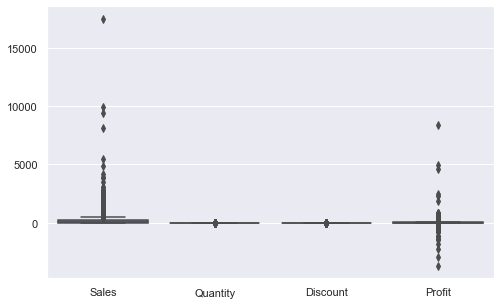

In [77]:
sns.boxplot(data = center.iloc[:,6:])

> ---> We have much **outliers** , the mean is very sensible 

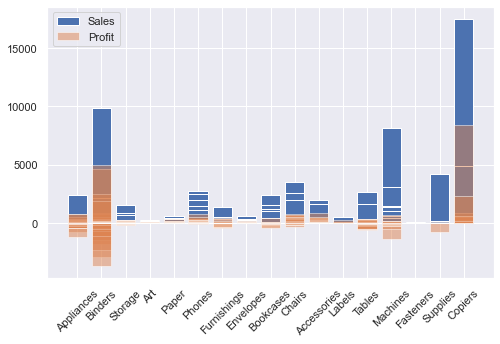

In [116]:
plt.bar(x = center['Sub-Category'] , height = center.Sales , label= 'Sales' )
plt.bar(x = center['Sub-Category'] , height = center.Profit, label = 'Profit' , alpha = 0.5 )
plt.xticks(rotation = 45)
plt.legend()
plt.show()

> We need to limit the subcategoris in the central region since not all of them are saled , we need to drop Labels, Envelopes,Papers , Art , Fasteners And Furnishings

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

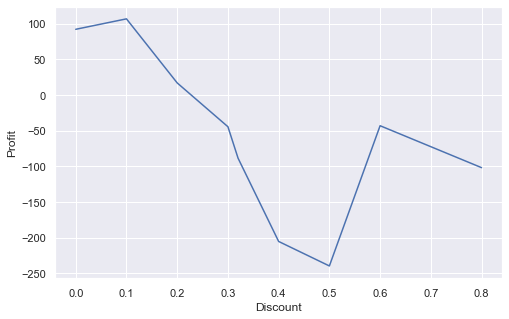

In [109]:
sns.lineplot(data = center , x = 'Discount' , y = 'Profit' , ci = None)

> #### --> We can see that the most profitable discount is 0 , 0.1 and 0.2

<AxesSubplot:xlabel='Quantity', ylabel='Profit'>

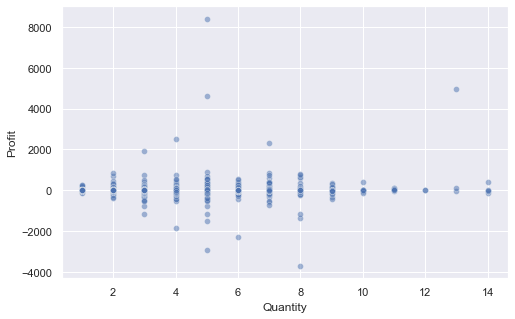

In [112]:
sns.scatterplot(data = center , x = 'Quantity' , y = 'Profit' , ci = None , alpha = 0.5)

> We can see that quantities from 2 to 8 are the most profitable

### Let us make some channges and see the profit

In [126]:
center.columns = center.columns.str.replace('Sub-Category','sub_category')

In [170]:
df.columns = df.columns.str.replace('Sub-Category','sub_category')

In [135]:
center_v1 = center.copy()
center_v1 = center_v1.query("sub_category not in [ 'Labels', 'Envelopes','Papers' , 'Art' , 'Fasteners' , 'Furnishings']")

In [136]:
center_v1 = center_v1.query("Discount >= 0 & Discount <= 0.2")

In [137]:
center_v1 = center_v1.query('Quantity >=2 & Quantity <= 8')

<AxesSubplot:>

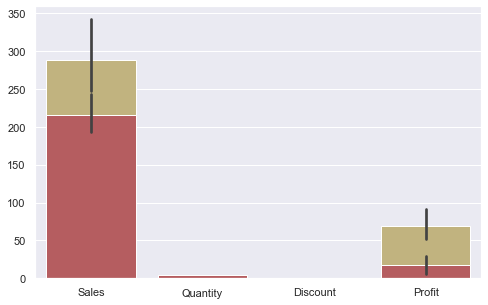

In [145]:
sns.barplot(data = center_v1.iloc[:,6:] , color = 'y')
sns.barplot(data = center.iloc[:,6:], color= 'r')

#### We can See that the profit is much higher

In [148]:
center_v1.Profit.mean()/center.Profit.mean()

4.0602501982770685

### We can see thet The Profit in center is 4 times much higher than before

## Create the finale DataSet after making more profit

In [171]:
df_finale = df.copy()

In [172]:
df.Region.unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [175]:
df_finale = df_finale.query("Region in ['South', 'West', 'East']")

In [176]:
df_finale = df_finale.append(center_v1)

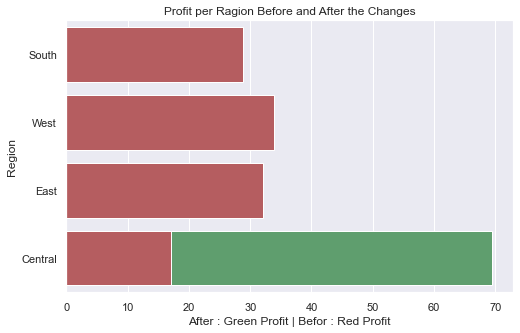

In [205]:
sns.barplot(data = df_finale , x = 'Profit' , y = 'Region', ci = None , color = 'g')
sns.barplot(data = df , x = 'Profit' , y = 'Region' , ci =None , color = 'r' , order = ['South', 'West', 'East' , 'Central']).set(title = 'Profit per Ragion Before and After the Changes');
plt.xlabel('After : Green Profit | Befor : Red Profit');


# Conclusion

>  We have augmented the **profit 4 times much higher than before** in the central region by **minimizing our products** , **discounts** and offer **quantities** between **2 to 8** 